In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zaraavagyan/weathercsv")

print("Path to dataset files:", path)

100%|██████████| 10.4k/10.4k [00:00<00:00, 8.07MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zaraavagyan/weathercsv/versions/1


In [8]:
import os

# List the files to inspect the actual filename
print("Listing files in dataset folder:")
for root, dirs, files in os.walk(path):
    for name in files:
        print("FILE:", os.path.join(root, name))
    for name in dirs:
        print("DIR:", os.path.join(root, name))


Listing files in dataset folder:
FILE: /root/.cache/kagglehub/datasets/zaraavagyan/weathercsv/versions/1/weather.csv


In [10]:
import pandas as pd

# Load the CSV file without parsing dates
df = pd.read_csv(data_path)

# Print the column names and the first few rows to inspect the structure
print("Columns in the dataset:", df.columns)
print(df.head())


Columns in the dataset: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...     

In [11]:
import pandas as pd

# Load the CSV file without parsing dates
df = pd.read_csv(data_path)

# Create a synthetic date column based on the index (assuming data is sorted)
df['Date'] = pd.date_range(start='1/1/2000', periods=len(df), freq='D')

# Inspect the data again to verify
print(df.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Pressure9am  \
0           30.0         SW         NW           6.0  ...       1019.7   
1           39.0          E          W           4.0  ...       1012.4   
2           85.0          N        NNE           6.0  ...       1009.5   
3           54.0        WNW          W          30.0  ...       1005.5   
4           50.0        SSE        ESE          20.0  ...       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1015.0         7         7     14.4     23.6         No      3

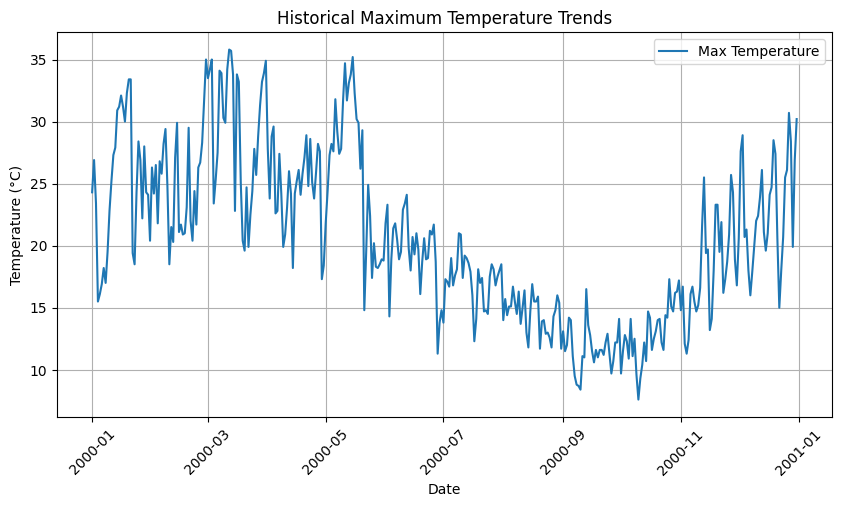

In [12]:
import matplotlib.pyplot as plt

# Visualize historical temperature trends (MaxTemp as an example)
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['MaxTemp'], label='Max Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Historical Maximum Temperature Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [13]:
# Feature Engineering: Convert Date to ordinal (numeric) for regression model
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Define features (X) and target (y)
X = df[['Date_ordinal']]
y = df['MaxTemp']  # You can use MinTemp, MaxTemp, or any other temperature column

# Split the data into training and test sets (keeping time order intact)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [14]:
from sklearn.linear_model import LinearRegression

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 141.73


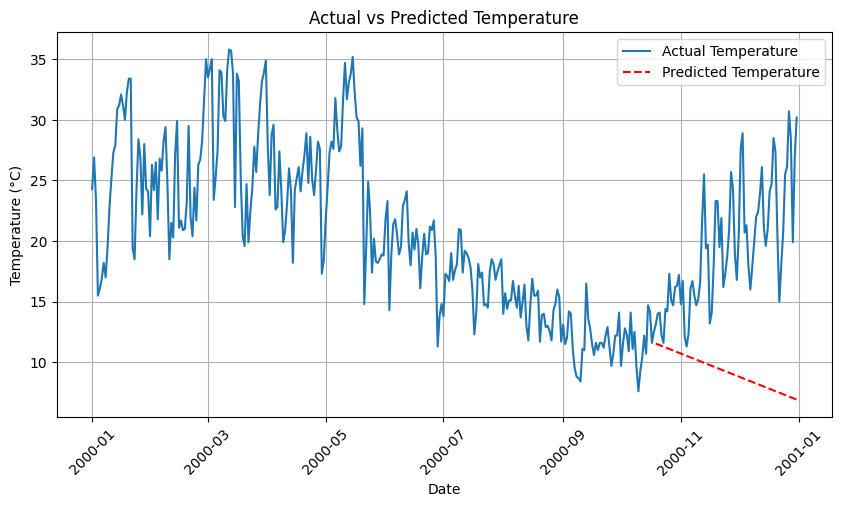

In [16]:
# Plot actual vs predicted temperatures
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], y, label='Actual Temperature')
plt.plot(df['Date'].iloc[len(X_train):], y_pred, color='red', linestyle='--', label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [17]:
# Predict future temperatures (for example, for the next 7 days)
future_days = 7
last_date = df['Date'].max()

# Generate future dates
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]
future_dates_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

# Predict future temperatures
future_predictions = model.predict(future_dates_ordinal)

# Display future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Temperature': future_predictions
})

print("\nFuture Temperature Predictions:")
print(future_df)



Future Temperature Predictions:
        Date  Predicted_Temperature
0 2001-01-01               6.856603
1 2001-01-02               6.793318
2 2001-01-03               6.730033
3 2001-01-04               6.666748
4 2001-01-05               6.603463
5 2001-01-06               6.540178
6 2001-01-07               6.476893


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


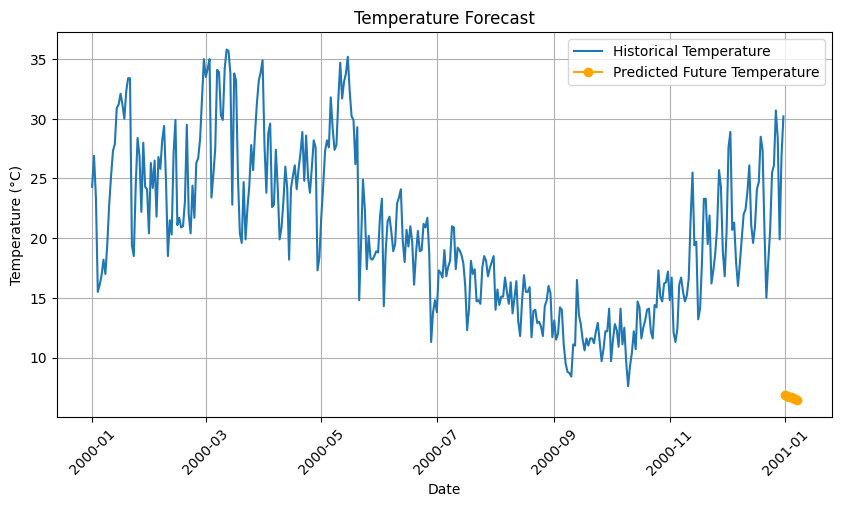

In [18]:
# Plot future predictions along with historical data
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['MaxTemp'], label='Historical Temperature')
plt.plot(future_df['Date'], future_df['Predicted_Temperature'], color='orange', marker='o', label='Predicted Future Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Forecast')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
